# Predicting Wine Quality

- Wine quality dataset used: https://archive.ics.uci.edu/dataset/186/wine+quality
- For more info: 
`Modeling wine preferences by data mining from physicochemical properties
By P. Cortez, A. Cerdeira, Fernando Almeida, Telmo Matos, J. Reis. 2009`

Two datasets created, using red and white wine samples.
The inputs include objective tests (e.g. PH values, alcohol percentage etc) and the output is based on sensory data
(median of at least 3 evaluations made by wine experts). Each expert graded the wine quality 
between 0 (very bad) and 10 (very excellent). 
  
- Number of Instances: red wine - 1599; white wine - 4898. 

- Number of Attributes: 11 + output attribute


In [84]:
# Standard import(s)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
# Load wine dataset
obs = pd.read_csv('wine_quality.csv')

In [86]:
# Show available properties of the dataset
obs.keys()

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [87]:
# Show first few rows of datset
obs.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,W
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,W
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,W
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,W
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,W


In [88]:
# Drop duplicate measurements -- makes sense in this case, since measurements 
# with identical rows would imply identical wines (at least in composition),
# which would be double counted in the dataset
obs = obs.drop_duplicates()

In [89]:
#How many entries
obs.shape

(5320, 13)

In [90]:
#How many of each type of wine

print ('# white: ' + str(obs.value_counts("type")["W"]))
print ('# red: ' + str(obs.value_counts("type")["R"]))

# white: 1359
# red: 3961


In [91]:
#Min and max wine qualities

print ('min quality: ' + str(obs.min()["quality"]))
print ('max quality: ' + str(obs.max()["quality"]))

min quality: 3
max quality: 9


In [92]:
#Grouby so can see which type of wine has a higher quality on average

obs.groupby(["type"]).mean()["quality"]

type
R    5.854835
W    5.623252
Name: quality, dtype: float64

In [93]:
#Again grouby to see how many measurements there are for each quality per wine type
#Both red and white mostly 5/6

obs.groupby(["type", "quality"])["fixed_acidity"].count()


type  quality
R     3            20
      4           153
      5          1175
      6          1788
      7           689
      8           131
      9             5
W     3            10
      4            53
      5           577
      6           535
      7           167
      8            17
Name: fixed_acidity, dtype: int64

---
#### Data preperation

- Define good and bad quality wines based on median value of each wine per type (red/white) - new variable `good_qual`
- Good (`good_qual` == 1) if quality greater or equal to median and vice versa for bad quality (`good_qual` == 0)

---

In [94]:
#See median for each wine type (both 6/10)

obs.groupby(['type']).median()['quality']

type
R    6.0
W    6.0
Name: quality, dtype: float64

In [95]:
#WHITE
#Drop original quality and type variables too

white = obs.loc[obs['type'] == 'W']
white['good_qual'] = (white['quality'] >= white['quality'].median()).astype(int)
white = white.drop(columns = ['quality', 'type'])
white


C:\Users\decla\AppData\Local\Temp\ipykernel_2836\2088088425.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  white['good_qual'] = (white['quality'] >= white['quality'].median()).astype(int)


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,good_qual
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,1
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [96]:
#RED
red = obs.loc[obs['type'] == 'R']
red['good_qual'] = (red['quality'] >= red['quality'].median()).astype(int)
red = red.drop(columns = ['quality', 'type'])
red

C:\Users\decla\AppData\Local\Temp\ipykernel_2836\1787928305.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  red['good_qual'] = (red['quality'] >= red['quality'].median()).astype(int)


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,good_qual
1599,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,1
1600,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,1
1601,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,1
1602,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1
1605,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1


---
## Red dataset
--------------------------------------------------------


In [97]:
#Can see stats per good/bad red wine for whichever variables (e.g. alcohol & sulphates)

red.groupby(['good_qual'])['alcohol', 'sulphates'].describe()

C:\Users\decla\AppData\Local\Temp\ipykernel_2836\2649954866.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  red.groupby(['good_qual'])['alcohol', 'sulphates'].describe()


alcohol                                                   sulphates  \
            count       mean       std  min   25%   50%   75%   max     count   
good_qual                                                                       
0          1348.0   9.909172  0.895594  8.0   9.2   9.7  10.5  13.6    1348.0   
1          2613.0  10.940254  1.212499  8.5  10.0  10.9  12.0  14.2    2613.0   

                                                             
               mean       std   min   25%   50%   75%   max  
good_qual                                                    
0          0.481825  0.100946  0.25  0.41  0.47  0.53  0.88  
1          0.494749  0.119275  0.22  0.41  0.48  0.56  1.08

---
## Visualisation 
---


In [98]:
# Sns colourmap for heatmap:
colormap = sns.diverging_palette(220, 10, as_cmap=True)

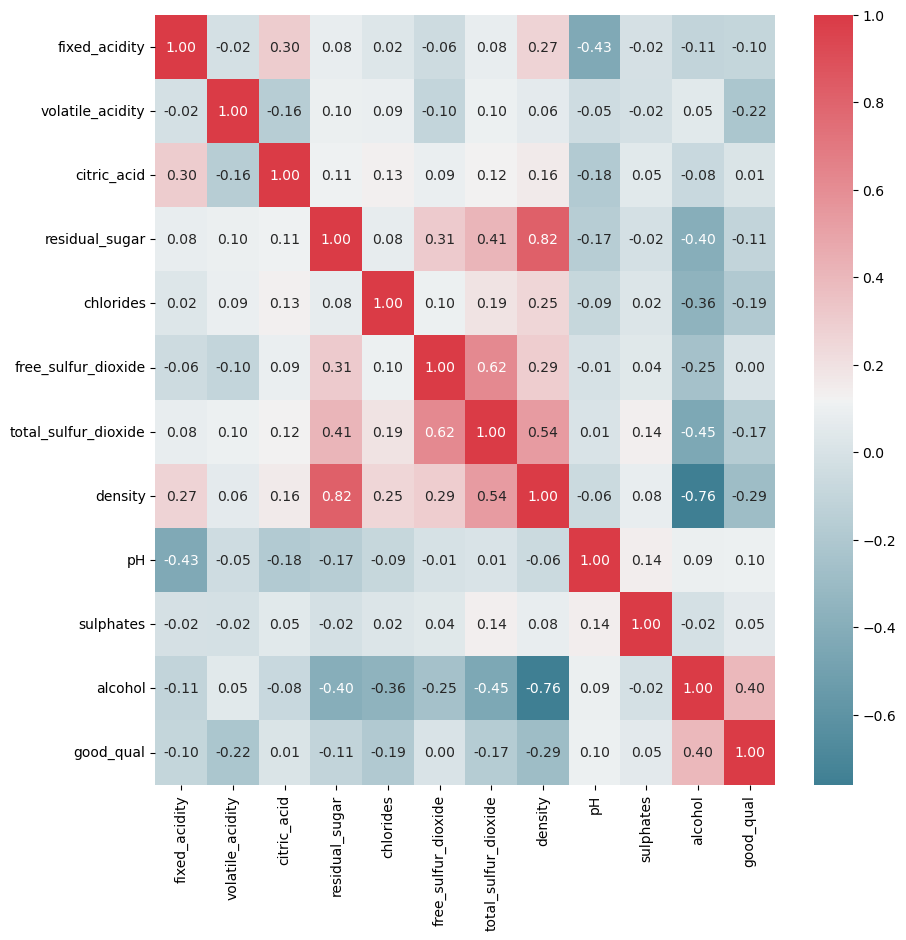

In [99]:
corr_matrix = red.corr()
fig, ax = plt.subplots(figsize=(10, 10))

# Generate Heat Map, allow annotations,
#and place floats in map

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap = colormap)
plt.show()

In [100]:
#Find most correlated values to chlorides

abs(corr_matrix['chlorides']).sort_values()

#In order: alcohol, density, total_sulfur_dioxide, citric_acid, free_sulfur_dioxide

sulphates               0.017871
fixed_acidity           0.024036
residual_sugar          0.076091
volatile_acidity        0.086287
pH                      0.090573
free_sulfur_dioxide     0.101272
citric_acid             0.132590
total_sulfur_dioxide    0.191145
good_qual               0.192464
density                 0.253088
alcohol                 0.356928
chlorides               1.000000
Name: chlorides, dtype: float64

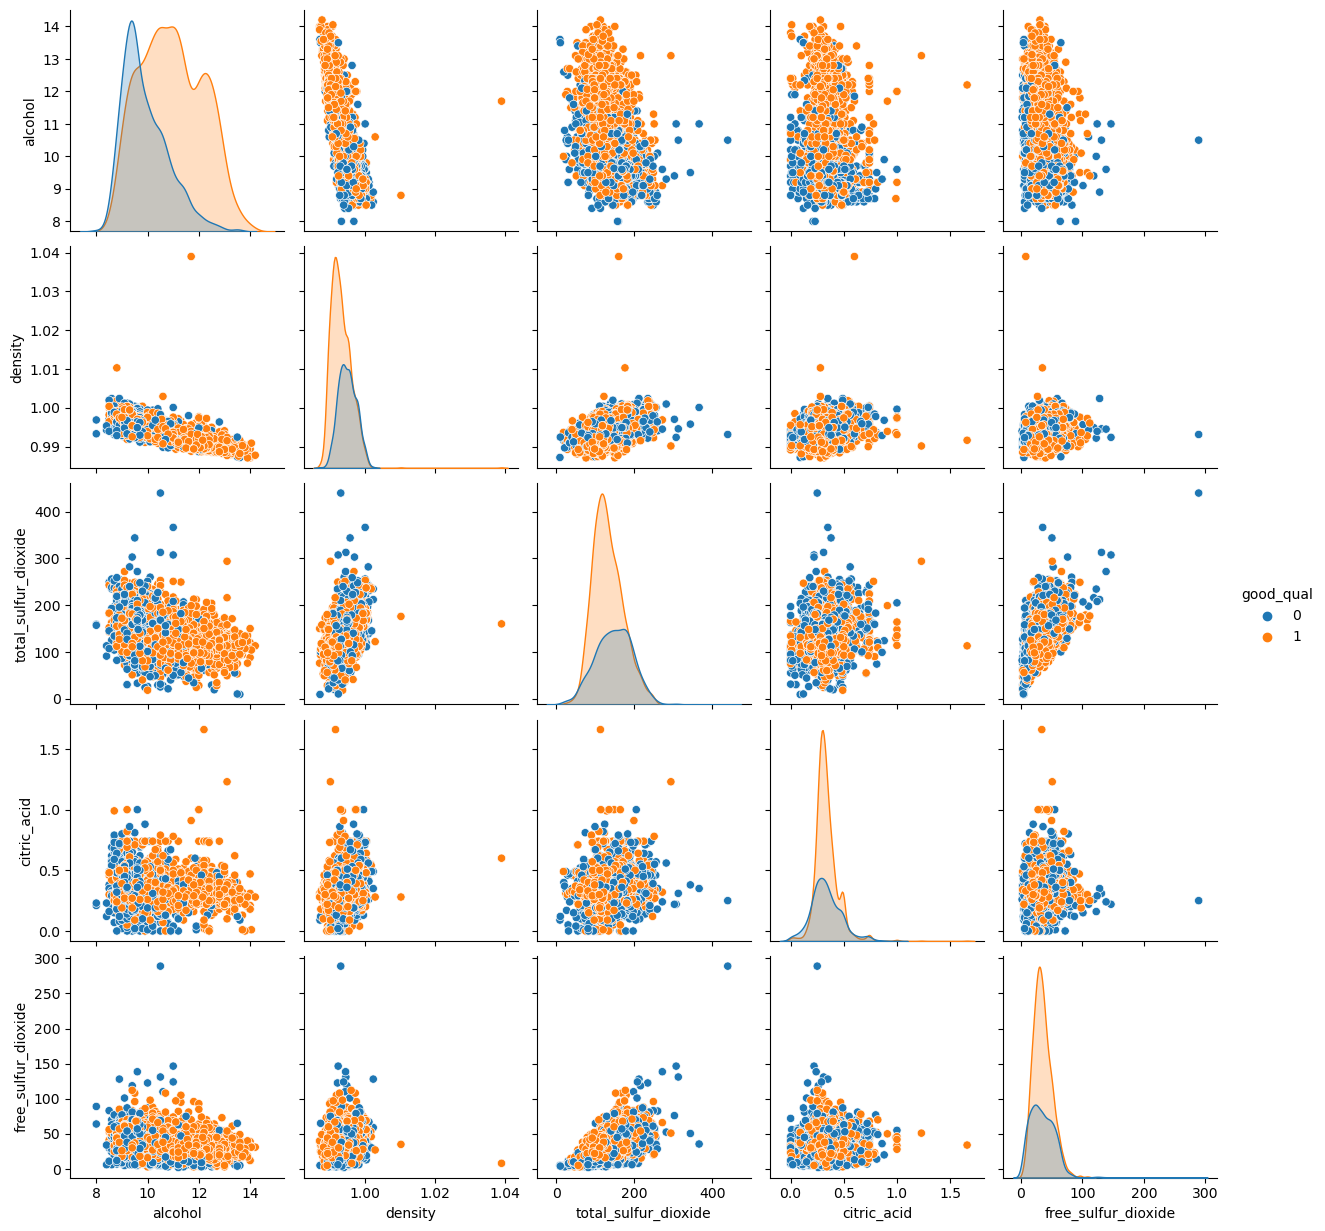

In [101]:
#Plot pairplot split by good_qual

sns.pairplot(red, hue = 'good_qual', vars = ['alcohol', 'density', 'total_sulfur_dioxide', 'citric_acid', 'free_sulfur_dioxide']);

In [102]:
#Find two most correlated features (have to remove diagonals which are of course completely correlated as same feature)

corr_abs = corr_matrix.abs()
corr_abs[corr_abs < 1].unstack().sort_values(ascending = False).head(1)

residual_sugar  density    0.820498
dtype: float64

In [103]:
red[['density', 'residual_sugar']]

,density,residual_sugar
1599,1.00100,20.7
1600,0.99400,1.6
1601,0.99510,6.9
1602,0.99560,8.5
1605,0.99490,7.0
...,...,...
6492,0.99114,1.6
6493,0.99490,8.0
6494,0.99254,1.2
6495,0.98869,1.1


C:\Users\decla\AppData\Local\Temp\ipykernel_2836\3960600298.py:29: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


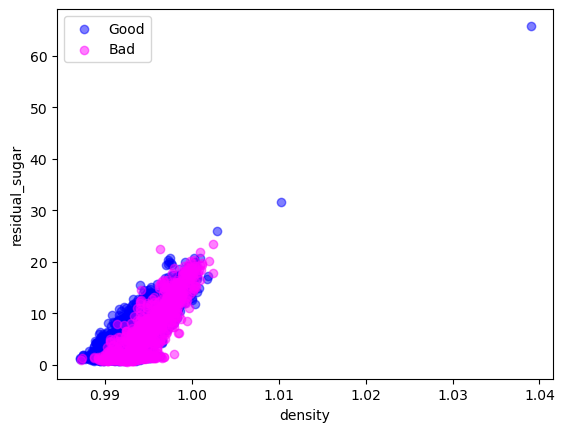

In [104]:
#Want to plot scatter plot of two most correlated features

# Features to plot
featx = 'density'
featy = 'residual_sugar'

# Create figure and axis objects.
fig, ax = plt.subplots()

for t in [1, 0]:
    # Boolean mask
    mask = red['good_qual'] == t

    if t == 1:
        lbl = 'Good'
        color = 'blue'
    if t == 0:
        lbl = 'Bad'
        color = 'magenta'

    # Scatter plot for current type
    ax.scatter(red[mask][featx], red[mask][featy], label=lbl, alpha=0.5, color = color)
    pass

# Draw legend
ax.legend()
ax.set_xlabel(featx)
ax.set_ylabel(featy)
fig.show()

---
### Data prep
---

In [105]:
# define data and features
features = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
target   = ['good_qual']
wtype = ["Poor","Good"]


In [106]:
#Dataset containing only desired features
#Drop duplicates & NaN values
#Shuffle

dataset = red[features + target]
dataset = dataset.dropna().drop_duplicates()
dataset = dataset.sample(frac = 1)


In [107]:
#Create sample containing first 1000 observations of each dataset for each quality
#Concat and get input and targets

frames = [dataset[dataset['good_qual'] == 1].head(1000),
          dataset[dataset['good_qual'] == 0].head(1000)]

sample = pd.concat(frames)
x = sample[features].values
y = sample[target].values.flatten()

In [108]:
#Check shape to make sure it makes sense

print (x.shape)
print (y.shape)

(2000, 11)
(2000,)


## Decision tree classification 
---

In [109]:
#Imports

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import export_graphviz
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics # Import scikit-learn metrics module for accuracy calculation
from sklearn import preprocessing # Import preprocessing for String-Int conversion

In [110]:
# split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

# Create Decision Tree classifer object with these parameters
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)

# Train Decision Tree Classifer
dt = dt.fit(x_train, y_train)

# Predict the response for test dataset
y_pred = dt.predict(x_train)
print("Accuracy train:", metrics.accuracy_score(y_train, y_pred))
y_pred = dt.predict(x_test)
print("Accuracy test:", metrics.accuracy_score(y_test, y_pred))

Accuracy train: 0.735
Accuracy test: 0.6966666666666667


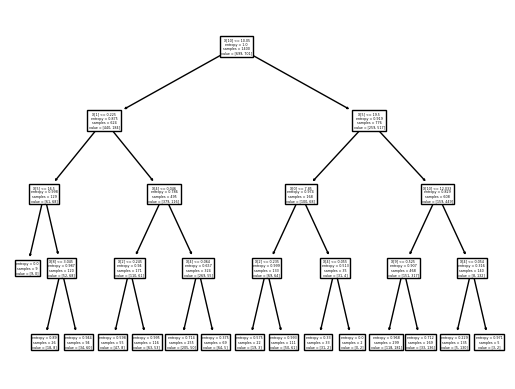

In [111]:
#Plot tree

plot_tree(dt);

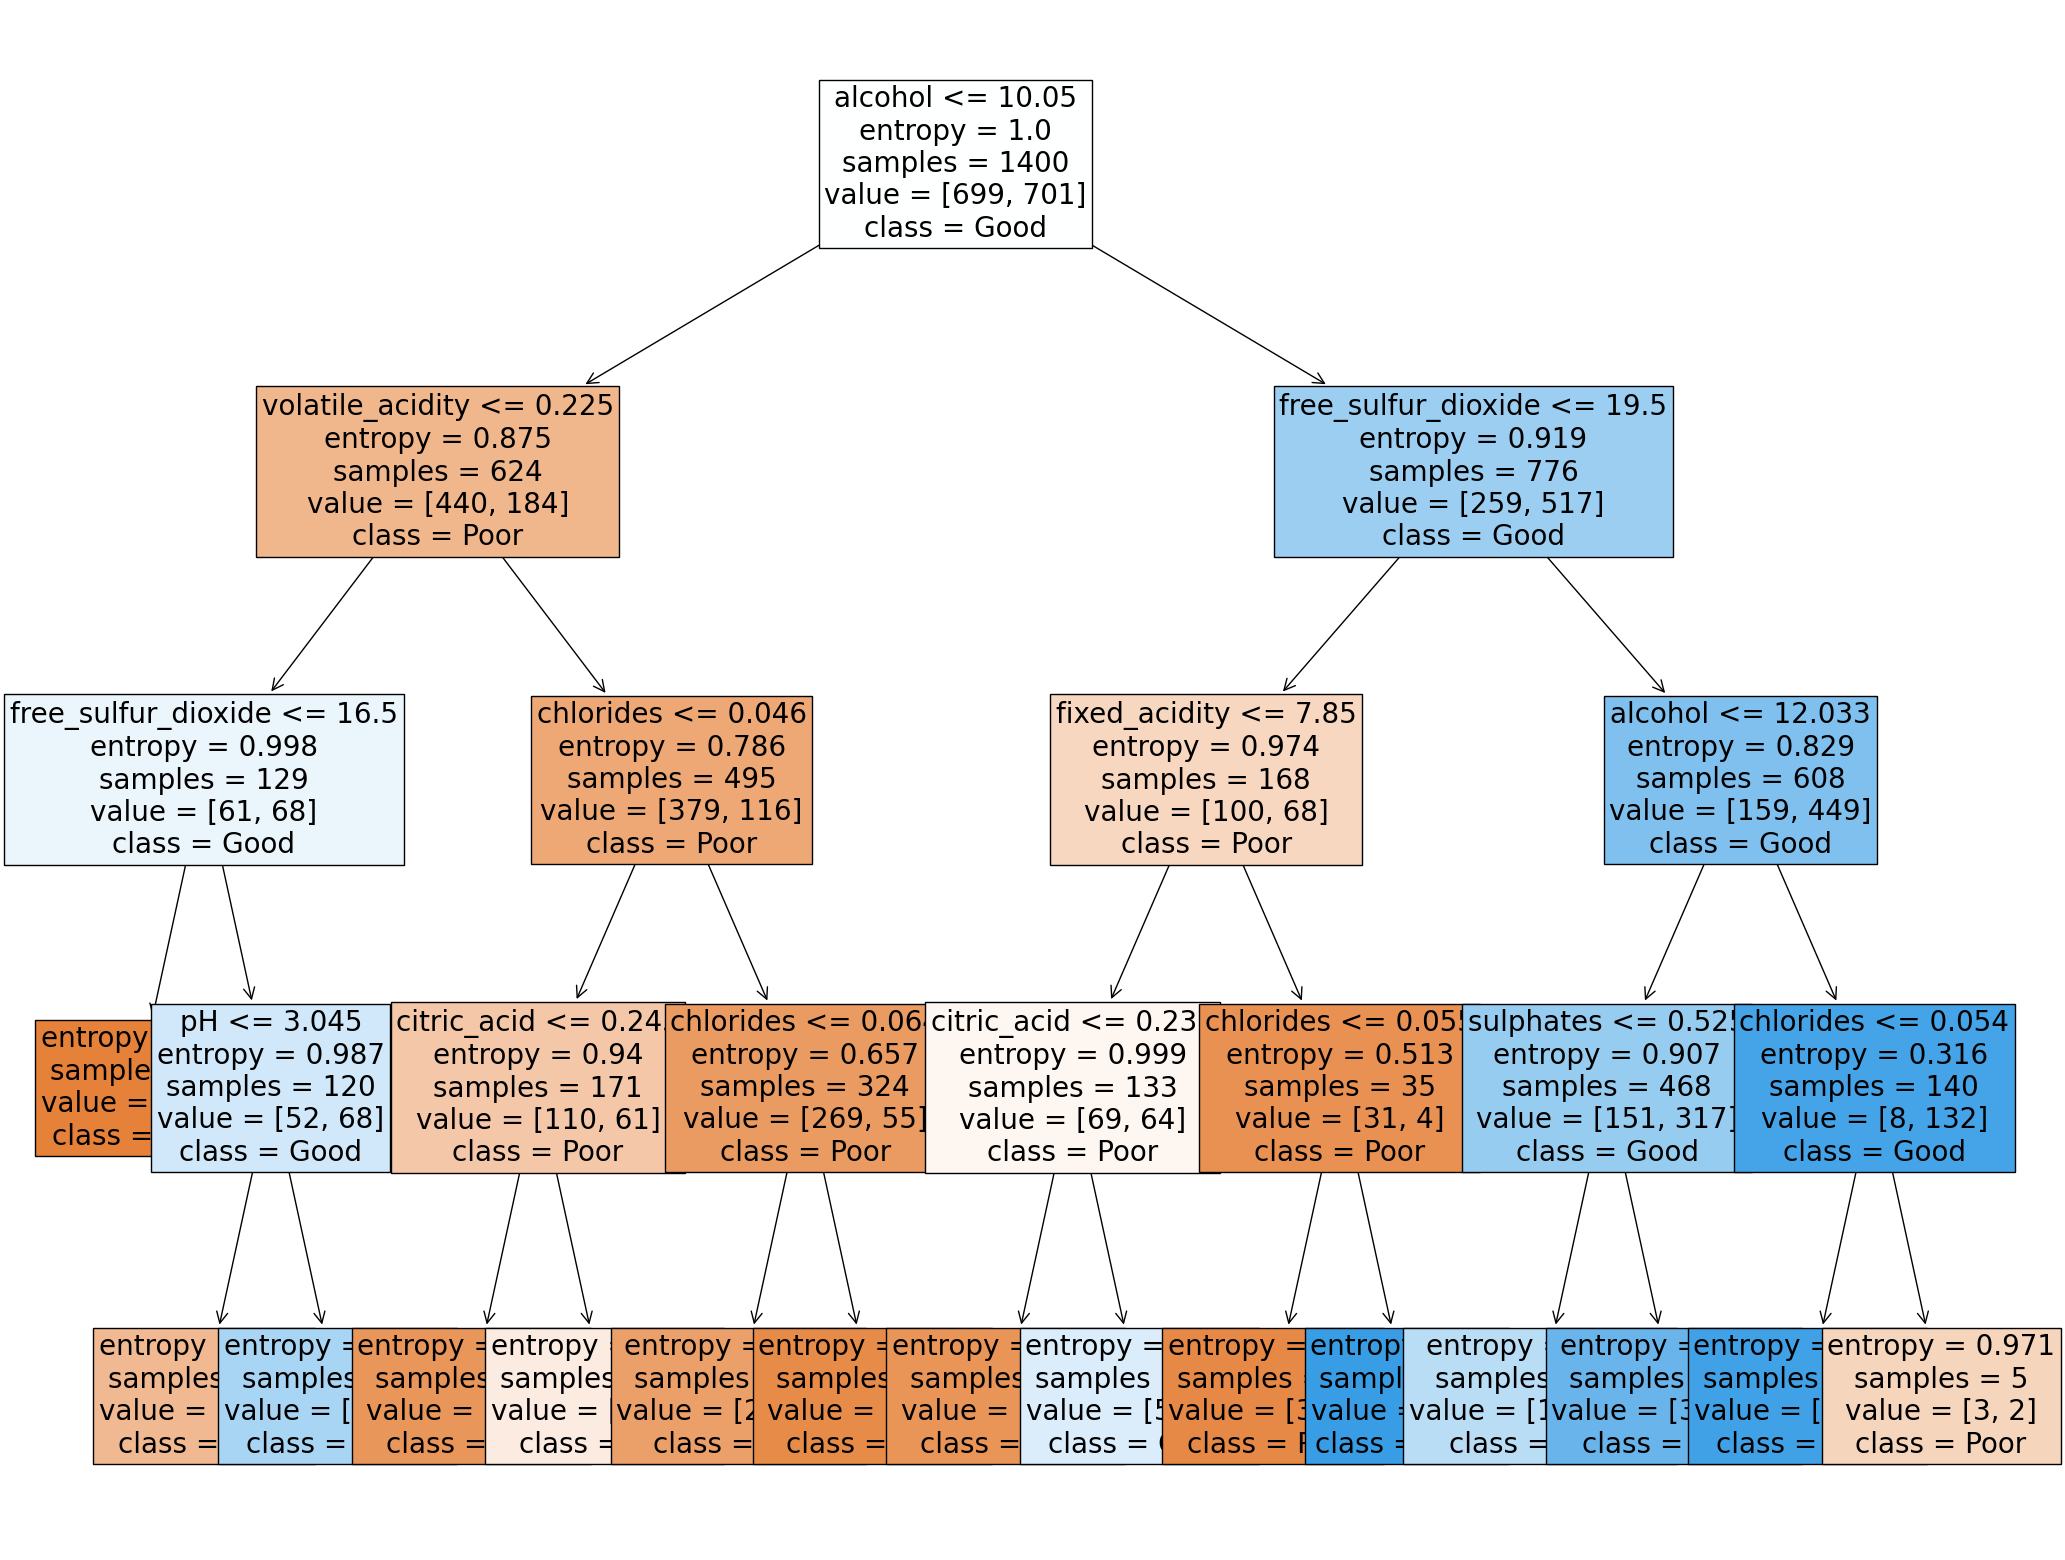

In [112]:
export_graphviz(dt,
                out_file="tree.dot",
                rounded=True,
                filled=True
               )
#save the decision_tree as png
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, 
                   feature_names=features,
                   class_names=wtype,
                   fontsize=20,
                   filled=True)
fig.savefig("decision_tree.png")

In [113]:
features[dt.feature_importances_.argmax()]

#alcohol percentage most important to classify quality (can also see earlier that its highly correlated with good_qual)

'alcohol'

## Boosted decision tree


In [114]:
#create boosted decision tree classifier object with these parameters
bdt = GradientBoostingClassifier( criterion = 'friedman_mse', max_depth = 4, n_estimators = 100)

#tree boosted decision tree classifier 
bdt = bdt.fit(x_train, y_train)

# Predict the response for test dataset
y_pred = bdt.predict(x_train)
print("Accuracy train:", metrics.accuracy_score(y_train, y_pred))
y_pred = bdt.predict(x_test)
print("Accuracy test:", metrics.accuracy_score(y_test, y_pred))

#Better accuracy than single decision tree

Accuracy train: 0.9092857142857143
Accuracy test: 0.73


---
## Random forest
---

In [115]:
rf = RandomForestClassifier(n_estimators = 100, criterion = 'gini', max_depth = 4, max_features = 5, random_state = 1) 

rf = rf.fit(x_train, y_train)

# Predict the response for test dataset
y_pred = rf.predict(x_train)
print("Accuracy train:", metrics.accuracy_score(y_train, y_pred))
y_pred = rf.predict(x_test)
print("Accuracy test:", metrics.accuracy_score(y_test, y_pred))


Accuracy train: 0.7878571428571428
Accuracy test: 0.755


- BDT performed better than all on training sample, but shows sign of overtraining
- RF performed marginally better than DT on testing sample, and has little overtraining
- Performace needs to be tuned by doing a hyperparameter optimisation

## Hyper parameter optimisation 

In [116]:
from sklearn.model_selection import GridSearchCV

In [117]:
#Scan over AdaBoostClassifier using this dictionary of parameters

ada_dic={
    "n_estimators":[10,50,100,200,500,1000],
    "learning_rate": [.05,.1,.5,1],
    }

In [118]:
grid_search = GridSearchCV( AdaBoostClassifier(), ada_dic, n_jobs = -1)

In [119]:
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.5, 1],
                         'n_estimators': [10, 50, 100, 200, 500, 1000]})

In [120]:
grid_search.best_estimator_

AdaBoostClassifier(learning_rate=0.05, n_estimators=1000)

In [121]:
grid_search.best_estimator_.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 0.05,
 'n_estimators': 1000,
 'random_state': None}

In [122]:
y_pred = grid_search.predict(x_train)
print("Accuracy Training:",metrics.accuracy_score(y_train, y_pred))
y_pred = grid_search.predict(x_test)
print("Accuracy Testing:",metrics.accuracy_score(y_test, y_pred))


Accuracy Training: 0.7921428571428571
Accuracy Testing: 0.7533333333333333
